# API Tests for Day Wise Data

## Loading data as pandas Dataframe

In [1]:
import pandas as pd
import requests
import json

In [2]:
df = pd.read_csv('FE_Data\Day_Wise_Data\Day_5.csv',parse_dates=True)

In [3]:
df.columns = ['date_time', 'Bearing1_Mean', 'Bearing2_Mean', 'Bearing3_Mean',
       'Bearing4_Mean', 'Bearing1_RMS', 'Bearing1_Kurt']

#### Load all values

In [4]:
url = "http://127.0.0.1:5000/Ano_Det_Uni"
df_output = []
for i in range(0,len(df)):
    mean_val = df.iloc[i,1]
    rms_val = df.iloc[i,5]
    input_data = {"rms":rms_val,"mean":mean_val}
    json_data = json.dumps(input_data)
    headers = {'Content-Type': 'application/json'}
    response = requests.request("POST", url, headers=headers, data = json_data)
    json_op = response.text
    op_data = json.loads(json_op)
    out = op_data['Output']
    df_output.append(out)

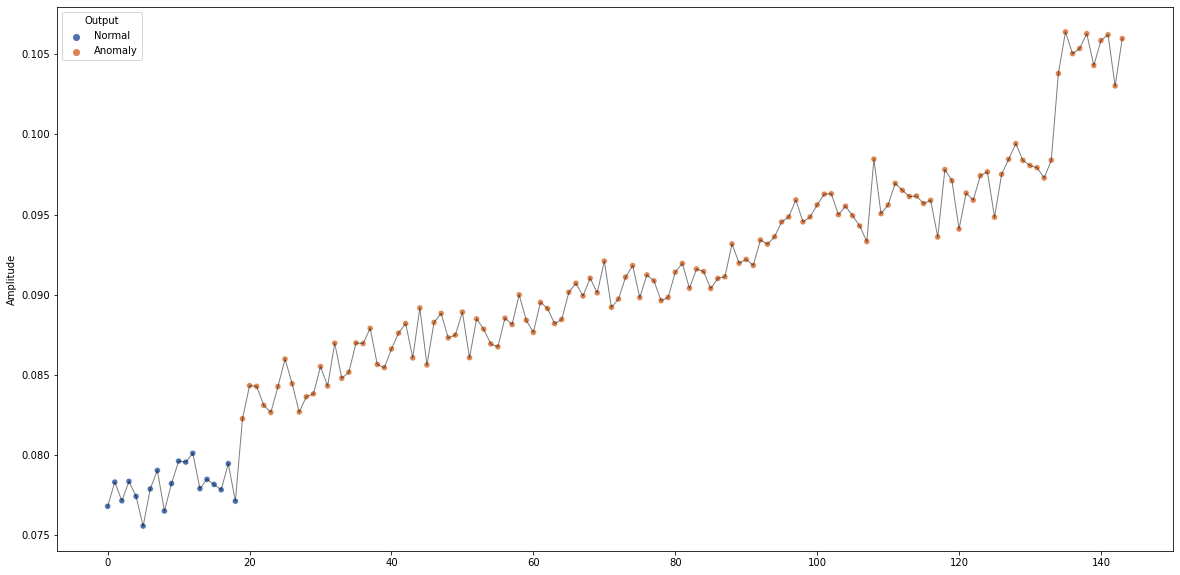

In [5]:
# Visualizing the results - DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
viz_df=pd.DataFrame({'Bearing_RMS':df.Bearing1_RMS,'Output':df_output})
plt.figure(figsize=(20,10))
plt.locator_params(axis='x', nbins=10)
sns.scatterplot(x=range(0,len(df.Bearing1_RMS)),y=viz_df.Bearing_RMS,hue=viz_df.Output,palette="deep")
plt.plot(viz_df.Bearing_RMS, color='black',linewidth=1,alpha=0.5)
plt.ylabel('Amplitude');